### Business Problem

There are around 1400 pharmacy in Ankara. The regular working hours for a pharmacy is between 8 am and 6 pm. However for some emergency situations around 20 pharmacy are open during all night. These night-pharmacies are selected on daily basis from the population. The current main selection criteria is official boundaries of districts in Ankara. There are 8 districts in Ankara. District boundaries criteria some times can cause inconvenient situations for the patients in emergency. Sometimes these night-pharmacies are not distributed homogeneously through the city.  
I believe that if this distribution would be made based on the proximity of pharmacies, It would be easier for everyone to reach them during the night.  
Therefore I suggest that Ankara should be clustered in 16 different group according to the proximity of the pharmacies.


### Data Set

The first data we need is the full pharmacy list including the address. The data source is below.  
https://www.eczaneler.gen.tr/eczaneler/ankara-sincan
I have combined the final data according to the central districts of Ankara via this web page.

Second thing we need for analysis is the geographical coordination of these pharmacies. These data will be produced by using geocoder in python  

When we get the all data we will produce:  

- Map the all pharmacies by the current criteria of official boundaries of districts.
- Calculate 16 clusters by using Python (k-means cluster approach)
- Map the all pharmacies by 16 clusters based on their geographical proximity.



In [ ]:
b + c

### import data

In [2]:
import pandas as pd

In [4]:
data = pd.read_excel("ecz.xlsx")
data.head(2)

Sıra    İlçe                  İsim  \
0     1  Sincan        Akçay Eczanesi   
1     2  Sincan  Akşemsettin Eczanesi   

                                               adres                tel  
0  Mareşal Çakmak Mahallesi, Ankara Caddesi, No:1...  0 (312) 268-10-11  
1  Akşemsettin Mahallesi, Figen Sokak, No:33/7 Si...  0 (312) 269-00-30

### find coordinates

In [50]:
def findcrd(address):
    import urllib.request, urllib.parse, urllib.error
    import json
    import ssl
    import re

    api_key = False
    if api_key is False:
        api_key = 42
        serviceurl = 'this part of code is private'
    else :
        serviceurl = 'https://maps.googleapis.com/maps/api/geocode/json?'

    # Ignore SSL certificate errors
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE

    while True:
        if len(address) < 1: break

        parms = dict()
        parms['address'] = address
        if api_key is not False: parms['key'] = api_key
        url = serviceurl + urllib.parse.urlencode(parms)
        uh = urllib.request.urlopen(url, context=ctx)
        data = uh.read().decode()
        try:
            js = json.loads(data)
        except:
            js = None

        if not js or 'status' not in js or js['status'] != 'OK':
            print('==== Failure To Retrieve ====')
            print(data)
            continue

        lat = js['results'][0]['geometry']['location']['lat']
        lng = js['results'][0]['geometry']['location']['lng']
        location = js['results'][0]['formatted_address']
        Coor =(lat,lng)
        return Coor
        break

In [53]:
A ={}
for x in range(len(data)):
    A[x]=findcrd(data["adres"][x])
    print(data["isim"][x], A[x])

Ünlü Eczanesi (39.96272099999999, 32.5775001)
Utem Eczanesi (39.954329, 32.5598219)
Vitamin Eczanesi (39.9563444, 32.5980012)
Yağız Eczanesi (39.950484, 32.5839307)
Yalçın Eczanesi (39.96096199999999, 32.583841)
Yavuz Eczanesi (39.96110940000001, 32.5795689)
Yeni Ebru Eczanesi (39.9458455, 32.588113)
Yeni Mehmet Akif Eczanesi (39.9597376, 32.5645956)
Yeni Sevinç Eczanesi (39.99203199999999, 32.588426)
Yenikent Barış Eczanesi (40.001301, 32.5199324)
Yenikent Berk Eczanesi (40.013169, 32.51732)
Yiğit Eczanesi (39.9503929, 32.5680813)
Yüce Eczanesi (39.958124, 32.577609)
Yüceer Eczanesi (40.0150999, 32.530544)
Zambak Eczanesi (39.9917194, 32.5904183)
Zehra Eczanesi (39.9841582, 32.5697508)
Ahsen Eczanesi (39.9677906, 32.9441023)
Akalın Eczanesi (39.964632, 32.92187)
Aktar Eczanesi (39.967113, 32.96711)
Alemdağ Eczanesi (39.967839, 32.9299899)
Alibey Eczanesi (39.9713296, 32.9327302)
Altıparmak Eczanesi (39.935743, 32.8749414)
Anafartalar Füsun Eczanesi (39.9395933, 32.8592003)
Ankara Ecza

Bahar Soysal Eczanesi (39.8837517, 32.8566454)
Bahçelievler Eczanesi (39.9285196, 32.8260455)
Balgat Hakan Eczanesi (39.9035376, 32.8153062)
Balgat Merkez Eczanesi (39.8886213, 32.8164108)
Bankalar Eczanesi (39.885075, 32.8393436)
Barışcan Eczanesi (39.9053457, 32.8683741)
Başak Eczanesi (39.91522800000001, 32.8211562)
Baştürk Eczanesi (39.928932, 32.84458)
Belen Eczanesi (39.929628, 32.870555)
Belit Eczanesi (39.9251635, 32.8298552)
Bensu Eczanesi (39.857938, 32.830757)
Beril Bulut Eczanesi (39.8566964, 32.7126295)
Berin Eczanesi (39.9283729, 32.8544267)
Berk Eczanesi (39.9112381, 32.8204429)
Besakule Metropol Eczanesi (39.9092805, 32.8041833)
Beşparmak Eczanesi (39.9060225, 32.8812368)
Betül Eczanesi (39.88336, 32.836837)
Betül Önder Eczanesi (39.869703, 32.827489)
Beyazgül Eczanesi (39.9079489, 32.8683982)
Beysukent Eczanesi (39.8963673, 32.7242411)
Beysupark Eczanesi (39.8779191, 32.7060534)
Beyza Eczanesi (39.9105702, 32.7662627)
Beyzam Eczanesi (39.883998, 32.8199029)
Bihter Ecza

Lavanta Eczanesi (39.8986187, 32.8121239)
Leman Eczanesi (39.9196956, 32.823819)
Levent Eczanesi (39.8696516, 32.8625915)
Lina Eczanesi (39.868935, 32.863611)
Lünet Eczane-Optik (39.9093176, 32.8617099)
Madenoğlu Eczanesi (39.93242, 32.823276)
Maıdan Kuzucu Eczanesi (39.8746147, 32.7475962)
Maltepe Eczanesi (39.9293829, 32.8457171)
Mataracı Eczanesi (39.8962429, 32.7046385)
Mayıs Eczanesi (39.875976, 32.833796)
Mehmet Eczanesi (39.875696, 32.8391487)
Melita Eczanesi (39.9088505, 32.7532113)
Merve Baysal Eczanesi (39.8822307, 32.6904788)
Meşrutiyet Eczanesi (39.9188941, 32.8599343)
Metropol Eczanesi (39.934511, 32.835754)
Mevlana Eczanesi (39.930284, 32.873576)
Mimoza Eczanesi (39.873222, 32.8639809)
Mir Eczanesi (39.865348, 32.683199)
Miray Eczanesi (39.886955, 32.833636)
Mithatpaşa Plus Eczanesi (39.9075236, 32.8611588)
Müge Eczanesi (39.934188, 32.837206)
Müjde Eczanesi (39.912044, 32.869407)
Muratlı Eczanesi (39.906574, 32.864078)
Mustafa Kemal Eczanesi (39.912821, 32.7697968)
Mutlu

Bengisu Eczanesi (39.9944327, 32.6239742)
Beyhekim Eczanesi (39.9546019, 32.6285448)
Bizim Eczanesi (39.947319, 32.667976)
Bosna Eczanesi (39.931643, 32.653917)
Burcum Eczanesi (39.9924715, 32.6142356)
Büşra Eczanesi (39.95317800000001, 32.6165949)
Cevahir Eczanesi (39.935781, 32.637153)
Concept Eryaman Eczanesi (40.002101, 32.617121)
Demircanlar Eczanesi (39.9491945, 32.6422912)
Derya Bektaş Eczanesi (39.9366418, 32.657618)
Devlet Eczanesi (39.9566704, 32.612154)
Dört Mevsim Eczanesi (39.9668014, 32.6598015)
Elif Ipek Eczanesi (39.954184, 32.628867)
Elvankent Meram Eczanesi (39.941405, 32.638606)
Elvankent Merkez Eczanesi (39.95365520000001, 32.6080658)
Emel Eczanesi (39.940582, 32.65553)
Emirler Eczanesi (39.942344, 32.66294)
Eryaman Cansu Eczanesi (39.9779509, 32.6185413)
Eti Eczanesi (39.952562, 32.6327611)
Etiler Eczanesi (39.9499054, 32.6626356)
Etimesgut Cadde Eczanesi (39.9454008, 32.660527)
Eylül Eczanesi (39.971708, 32.6527309)
Ezgi Altuntaş Eczanesi (39.9410764, 32.6148127)


Genç Eczanesi (39.96923, 32.840837)
Gençaslan Eczanesi (39.9982633, 32.8093295)
Gökay Eczanesi (40.0044345, 32.8369412)
Güler Eczanesi (39.999472, 32.857201)
Gülşehir Eczanesi (39.9720164, 32.8419357)
Gülümse Eczanesi (39.9938969, 32.873975)
Gümüş Eczanesi (39.972449, 32.8428687)
Güneşin Eczanesi (40.001288, 32.87094)
Güniz Eczanesi (39.9737442, 32.8421481)
Haboğlu Eczanesi (39.971177, 32.835613)
Haneli Eczanesi (39.976792, 32.8650189)
Hilal Eczanesi (39.982648, 32.858036)
Hilal Taş Eczanesi (39.977294, 32.829447)
Hürmet Eczanesi (40.0530339, 32.8417559)
Ibrahimin Eczanesi (39.9997195, 32.8616734)
Ihlamur Eczanesi (40.003227, 32.886024)
Ilkbahar Eczanesi (39.986649, 32.819837)
Incirli Eczanesi (39.978842, 32.846088)
Irem Eczanesi (39.9806429, 32.8226101)
Işılım Eczanesi (39.99431999999999, 32.873939)
Kaan Eczanesi (39.9816828, 32.8328652)
Kafkaslar Eczanesi (40.0352848, 32.8527082)
Kağan Gökay Eczanesi (39.996691, 32.845003)
Kalaba Sağlık Eczanesi (39.9770931, 32.8653923)
Kalender Ecza

Kürşat Eczanesi (39.964754, 32.954171)
Kutlu Ozan Eczanesi (39.910349, 32.9025907)
Lavanta Eczanesi (39.921805, 32.88530800000001)
Leyla Eczanesi (39.96150799999999, 32.936292)
Limon Eczanesi (39.922236, 32.913467)
Mamak Eczanesi (39.929131, 32.910889)
Mega Eczanesi (39.8873596, 32.9341392)
Meltem Eczanesi (39.918188, 32.88955600000001)
Mervenin Eczanesi (39.9143719, 32.8868892)
Müftüoğlu Eczanesi (39.970408, 33.115029)
Nar Çiçeği Eczanesi (39.896773, 32.919012)
Nar Eczanesi (39.9273456, 32.8884892)
Natoyolu Eczanesi (39.9003417, 32.9200482)
Nazlım Eczanesi (39.91405109999999, 32.8878736)
Nefes Eczanesi (39.926656, 32.895892)
Nesrin Eczanesi (39.927714, 32.897016)
Nokta Eczanesi (39.9616266, 32.9358731)
Nurefşan Eczanesi (39.9185779, 32.897939)
Özer Eczanesi (39.9188283, 32.8878054)
Öznur Koçak Eczanesi (39.922512, 32.903996)
Piri Eczanesi (39.93838, 32.888366)
Pınarlı Eczanesi (39.9218409, 32.9140019)
Rumeli Eczanesi (39.936449, 32.8842349)
Rumeysa Eczanesi (39.935109, 32.886248)
Sağd

Susam Eczanesi (39.95527930000001, 32.7094746)
Talip Eczanesi (39.97039950000001, 32.7805834)
Tokgöz Eczanesi (39.9682667, 32.7171159)
Toprak Eczanesi (39.95984, 32.790977)
Tunam Eczanesi (39.9696434, 32.6984422)
Türkan Eczanesi (39.967288, 32.787776)
Urankent Şeyma Eczanesi (39.9646289, 32.7759889)
Uygun Eczanesi (39.967146, 32.714228)
Velican Eczanesi (39.9815534, 32.65891910000001)
Vera Eczanesi (39.9581412, 32.7095685)
Vereseli Gazi Eczanesi (39.942595, 32.8138239)
Yaren Eczanesi (39.962035, 32.810139)
Yeni Betül Eczanesi (39.972262, 32.807372)
Yeni Bilim Eczanesi (39.9702001, 32.7857426)
Yeni Bilir Eczanesi (39.9627691, 32.7884802)
Yeni Dilek Eczanesi (39.9621816, 32.7919189)
Yeni Ertürk Eczanesi (39.9706205, 32.6956017)
Yeni Gizem Eczanesi (39.96958, 32.781357)
Yeni Hakan Eczanesi (39.966833, 32.807874)
Yeni Irem Eczanesi (39.9706205, 32.6956017)
Yeni Koçyiğit Eczanesi (40.003248, 32.6184797)
Yeni Melek Eczanesi (39.929752, 32.8153266)
Yeni Nefes Eczanesi (39.9667222, 32.7190115)

In [45]:
A

{0: (39.956898, 32.5886333),
 1: (39.9645604, 32.5812932),
 2: (39.9646666, 32.5926522),
 3: (39.96391879999999, 32.6025293),
 4: (39.9598075, 32.5648874),
 5: (39.956365, 32.58356),
 6: (39.94594499999999, 32.588134),
 7: (39.94585500000001, 32.57044),
 8: (39.956645, 32.588177),
 9: (39.956707, 32.577962),
 10: (39.951712, 32.5750249),
 11: (39.958061, 32.564279),
 12: (39.96511599999999, 32.5779629),
 13: (39.9500832, 32.5860171),
 14: (39.9500863, 32.5859363),
 15: (39.957525, 32.555705),
 16: (39.971873, 32.582366),
 17: (39.9497264, 32.5950565),
 18: (39.9707772, 32.5938237),
 19: (39.9493428, 32.6011192),
 20: (39.9498185, 32.586028),
 21: (39.9625375, 32.5772419),
 22: (39.970533, 32.57461),
 23: (39.946682, 32.578141),
 24: (39.946071, 32.571177),
 25: (39.95511, 32.57145),
 26: (39.968987, 32.589061),
 27: (39.9712591, 32.5812042),
 28: (39.9911502, 32.5961656),
 29: (39.949203, 32.576348),
 30: (40.001589, 32.519936),
 31: (39.980722, 32.601633),
 32: (39.989568, 32.574705),

### final data

In [5]:
data = pd.read_excel("ecz2.xlsx")

In [6]:
data.head()

Sıra    İlçe                  İsim  \
0     1  Sincan        Akçay Eczanesi   
1     2  Sincan  Akşemsettin Eczanesi   
2     3  Sincan       Aktürk Eczanesi   
3     4  Sincan     Alıçaltı Eczanesi   
4     5  Sincan        Alkan Eczanesi   

                                               adres                tel  \
0  Mareşal Çakmak Mahallesi, Ankara Caddesi, No:1...  0 (312) 268-10-11   
1  Akşemsettin Mahallesi, Figen Sokak, No:33/7 Si...  0 (312) 269-00-30   
2  Akşemsettin Mahallesi, Polatlı 1 Caddesi, No:3...  0 (312) 270-20-19   
3  Osmanlı Mahallesi, M. Sinan Sokak, No:93/a Sin...  0 (312) 264-44-44   
4  Akşemsettin Mahallesi, Figen Sokak, No:35/a-B ...  0 (312) 268-30-60   

         lat        lon  
0  39.958967  32.592694  
1  39.970846  32.592883  
2  39.969065  32.586123  
3  39.946375  32.578629  
4  39.970526  32.593074

### Map 

In [7]:
import folium

In [8]:
# create map of Ankara latitude and longitude values
map_ankara = folium.Map(location=[39.91, 32.82], zoom_start=11)

In [9]:
map_ankara

In [118]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(data.lat, data.lon):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
# add incidents to map
map_ankara.add_child(incidents)

**map by districts**

In [119]:
sin = data[data["İlçe"]=="Sincan"]
alt = data[data["İlçe"]=="Altındağ"]
can = data[data["İlçe"]=="Çankaya"]
etm = data[data["İlçe"]=="Etimesgut"]
kec = data[data["İlçe"]=="Keçiören"]
mam = data[data["İlçe"]=="Mamak"]
yen = data[data["İlçe"]=="Yenimahalle"]
pur = data[data["İlçe"]=="Pursaklar"]

In [120]:
# for colors:
names =[[sin,"green","green"],[alt,"orange","orange"],[can,"blue","blue"],[etm,"yellow","orange"],
          [kec,"green","green"],[mam,"purple","purple"],[yen,"red","red"],[pur,"yellow","green"]]

In [121]:
incidents = folium.map.FeatureGroup()
for x in [0,1,2,3,4,5,6,7]:
    for lat, lng, in zip(names[x][0].lat, names[x][0].lon):
        incidents.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=3, # define how big you want the circle markers to be
                color=names[x][1],
                fill=True,
                fill_color=names[x][2],
                fill_opacity=0.6
            )
        )
# add incidents to map
map_ankara.add_child(incidents)

#### Seaborn Scatterplot

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

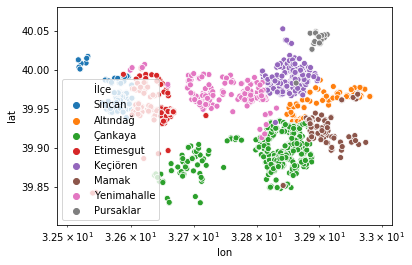

In [15]:
g =sns.scatterplot(y="lat", x="lon", sizes=(1,1),
              hue="İlçe",
            
              data=data);
g.set(xscale="log");

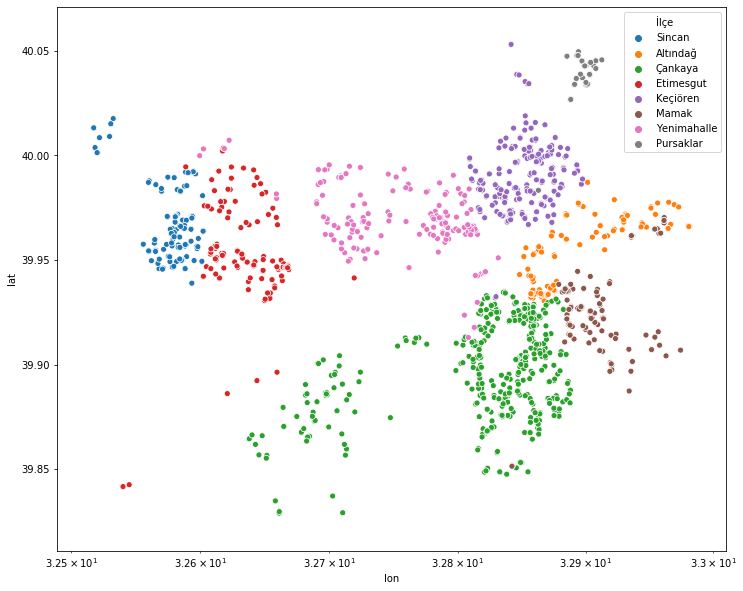

In [122]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(12, 10)

g =sns.scatterplot(y="lat", x="lon", sizes=(1,1),
              hue="İlçe",
            
              data=data);
g.set(xscale="log");

## k-means cluster

In [10]:
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

C:\Users\PcHome\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
x1=data.lat
x2=data.lon

In [12]:
X = pd.DataFrame()

In [13]:
X["lat"] = data["lat"]
X["lon"] = data["lon"]

In [14]:
X.head(2)

lat        lon
0  39.958967  32.592694
1  39.970846  32.592883

In [15]:
X = np.array(X)

In [16]:
k_means = KMeans(init="k-means++", n_clusters=16, n_init=12)

In [17]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
k_means_labels = k_means.labels_
k_means_labels

array([11, 11, 11, ...,  8,  8,  8])

In [19]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[39.87463574, 32.83046816],
       [39.971112  , 32.61484059],
       [39.98617621, 32.8775004 ],
       [39.97078079, 32.71669582],
       [39.93022201, 32.86641226],
       [39.97183919, 32.79402484],
       [39.87617325, 32.68683513],
       [39.91757491, 32.91597138],
       [40.03893809, 32.88982738],
       [39.91885703, 32.81608162],
       [40.00492589, 32.52895627],
       [39.95716708, 32.58076796],
       [39.94937739, 32.65198337],
       [39.89161394, 32.86354355],
       [39.96781035, 32.94650048],
       [39.98684032, 32.84470797]])

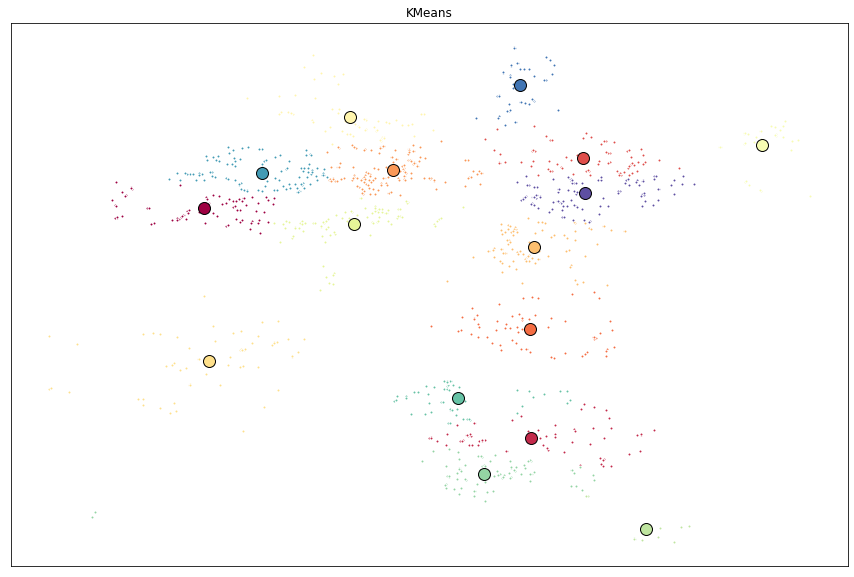

In [22]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[1,1], [2,1], [3,1], [4, 2], 
                             [1,2], [2,2], [3,2], [4, 3],
                             [1,3], [2,3], [3,3], [4, 4], 
                             [1,4], [2,4], [3,4], [4, 5] ])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=12)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

In [23]:
num_clusters = 16
#k_means = KMeans(init="k-means++", n_clusters=20, n_init=12)

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(X)
labels = k_means.labels_

In [24]:
X

array([[39.958967 , 32.592694 ],
       [39.970846 , 32.592883 ],
       [39.969065 , 32.586123 ],
       ...,
       [40.0444327, 32.903963 ],
       [40.0348491, 32.9002801],
       [40.042737 , 32.899348 ]])

In [25]:
data["Labels"] = labels

In [26]:
data["Labels"].unique()

array([ 3,  9, 14, 10,  6,  7, 11,  2,  1, 12,  8, 13, 15,  0,  5,  4])

In [27]:
a1 = data[data["Labels"]==1]
a2 = data[data["Labels"]==2]
a3 = data[data["Labels"]==3]
a4 = data[data["Labels"]==4]
a5 = data[data["Labels"]==5]
a6 = data[data["Labels"]==6]
a7 = data[data["Labels"]==7]
a8 = data[data["Labels"]==8]
a9 = data[data["Labels"]==9]
a10 = data[data["Labels"]==10]
a11 = data[data["Labels"]==11]
a12 = data[data["Labels"]==12]
a13 = data[data["Labels"]==13]
a14 = data[data["Labels"]==14]
a15 = data[data["Labels"]==15]
a16 = data[data["Labels"]==0]

In [28]:
names =[[a1,"cyan","green"],[a2,"orange","blue"],[a3,"#3BB9FF","blue"],[a4,"yellow","red"],
          [a5,"darkblue","red"],[a6,"purple","purple"],[a7,"#728C00","maroon"],[a8,"red","yellow"],
        [a9,"maroon","green"],[a10,"magenta","orange"],[a11,"red","blue"],[a12,"yellow","blue"],
          [a13,"green","green"],[a14,"olive","purple"],[a15,"purple","red"],[a16,"lime","yellow"],
       ]

In [29]:
incidents = folium.map.FeatureGroup()
for x in range(0,16):
    for lat, lng, in zip(names[x][0].lat, names[x][0].lon):
        incidents.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=3, # define how big you want the circle markers to be
                color=names[x][1],
                fill=True,
                fill_color=names[x][2],
                fill_opacity=0.9
            )
        )
# add incidents to map
map_ankara.add_child(incidents)

In [179]:
data.head(1)

Sıra    İlçe            İsim  \
0     1  Sincan  Akçay Eczanesi   

                                               adres                tel  \
0  Mareşal Çakmak Mahallesi, Ankara Caddesi, No:1...  0 (312) 268-10-11   

         lat        lon  Labels  
0  39.958967  32.592694       0

### Groupby Districts

In [180]:
data.groupby(["İlçe"], as_index=False).count() 

İlçe  Sıra  İsim  adres  tel  lat  lon  Labels
0     Altındağ   128   128    128  128  128  128     128
1    Etimesgut   137   137    137  137  137  137     137
2     Keçiören   211   211    211  211  211  211     211
3        Mamak   116   116    116  116  116  116     116
4    Pursaklar    34    34     34   34   34   34      34
5       Sincan   116   116    116  116  116  116     116
6  Yenimahalle   178   178    178  178  178  178     178
7      Çankaya   419   419    419  419  419  419     419

### Groupby Clusters

In [181]:
data.groupby(["Labels"], as_index=False).count() 

Labels  Sıra  İlçe  İsim  adres  tel  lat  lon
0        0   120   120   120    120  120  120  120
1        1   184   184   184    184  184  184  184
2        2    91    91    91     91   91   91   91
3        3   107   107   107    107  107  107  107
4        4   123   123   123    123  123  123  123
5        5    77    77    77     77   77   77   77
6        6    64    64    64     64   64   64   64
7        7    55    55    55     55   55   55   55
8        8    89    89    89     89   89   89   89
9        9    96    96    96     96   96   96   96
10      10    39    39    39     39   39   39   39
11      11    73    73    73     73   73   73   73
12      12    99    99    99     99   99   99   99
13      13    13    13    13     13   13   13   13
14      14    44    44    44     44   44   44   44
15      15    65    65    65     65   65   65   65

In [182]:
data.groupby(["İlçe", "Labels"], as_index=False).count() 

İlçe  Labels  Sıra  İsim  adres  tel  lat  lon
0      Altındağ       1    74    74     74   74   74   74
1      Altındağ       4    13    13     13   13   13   13
2      Altındağ       7    41    41     41   41   41   41
3     Etimesgut       0    31    31     31   31   31   31
4     Etimesgut       5    75    75     75   75   75   75
5     Etimesgut       6     3     3      3    3    3    3
6     Etimesgut      11     2     2      2    2    2    2
7     Etimesgut      14    26    26     26   26   26   26
8      Keçiören       4   109   109    109  109  109  109
9      Keçiören       9    95    95     95   95   95   95
10     Keçiören      10     6     6      6    6    6    6
11     Keçiören      12     1     1      1    1    1    1
12        Mamak       1    36    36     36   36   36   36
13        Mamak       7    14    14     14   14   14   14
14        Mamak       8     1     1      1    1    1    1
15        Mamak      15    65    65     65   65   65   65
16    Pursaklar       4     1     1      1    1    1    1
17    Pursaklar      10    33    33     33   33   33   33
18       Sincan       0    89    89     89   89   89   89
19       Sincan      13    13    13     13   13   13   13
20       Sincan      14    14    14     14   14   14   14
21  Yenimahalle       2    91    91     91   91   91   91
22  Yenimahalle       5     2     2      2    2    2    2
23  Yenimahalle       9     1     1      1    1    1    1
24  Yenimahalle      11    71    71     71   71   71   71
25  Yenimahalle      12     9     9      9    9    9    9
26  Yenimahalle      14     4     4      4    4    4    4
27      Çankaya       1    74    74     74   74   74   74
28      Çankaya       3   107   107    107  107  107  107
29      Çankaya       6    61    61     61   61   61   61
30      Çankaya       8    88    88     88   88   88   88
31      Çankaya      12    89    89     89   89   89   89

In [183]:
data.groupby(["Labels", "İlçe", ], as_index=False).count() 

Labels         İlçe  Sıra  İsim  adres  tel  lat  lon
0        0    Etimesgut    31    31     31   31   31   31
1        0       Sincan    89    89     89   89   89   89
2        1     Altındağ    74    74     74   74   74   74
3        1        Mamak    36    36     36   36   36   36
4        1      Çankaya    74    74     74   74   74   74
5        2  Yenimahalle    91    91     91   91   91   91
6        3      Çankaya   107   107    107  107  107  107
7        4     Altındağ    13    13     13   13   13   13
8        4     Keçiören   109   109    109  109  109  109
9        4    Pursaklar     1     1      1    1    1    1
10       5    Etimesgut    75    75     75   75   75   75
11       5  Yenimahalle     2     2      2    2    2    2
12       6    Etimesgut     3     3      3    3    3    3
13       6      Çankaya    61    61     61   61   61   61
14       7     Altındağ    41    41     41   41   41   41
15       7        Mamak    14    14     14   14   14   14
16       8        Mamak     1     1      1    1    1    1
17       8      Çankaya    88    88     88   88   88   88
18       9     Keçiören    95    95     95   95   95   95
19       9  Yenimahalle     1     1      1    1    1    1
20      10     Keçiören     6     6      6    6    6    6
21      10    Pursaklar    33    33     33   33   33   33
22      11    Etimesgut     2     2      2    2    2    2
23      11  Yenimahalle    71    71     71   71   71   71
24      12     Keçiören     1     1      1    1    1    1
25      12  Yenimahalle     9     9      9    9    9    9
26      12      Çankaya    89    89     89   89   89   89
27      13       Sincan    13    13     13   13   13   13
28      14    Etimesgut    26    26     26   26   26   26
29      14       Sincan    14    14     14   14   14   14
30      14  Yenimahalle     4     4      4    4    4    4
31      15        Mamak    65    65     65   65   65   65

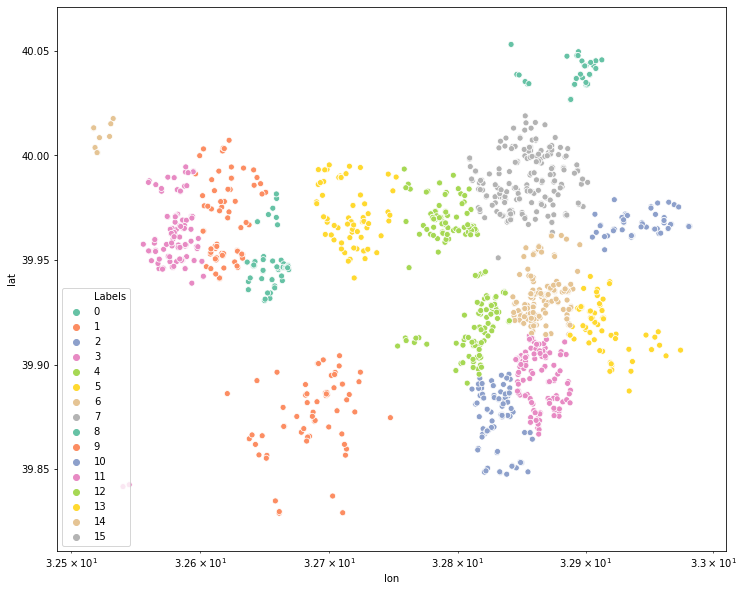

In [30]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(12, 10)

g =sns.scatterplot(y="lat", x="lon", sizes=(5,22),
              hue="Labels", palette="Set2",
            
              data=data);
g.set(xscale="log");